# **Assignment 2**
## **Convolutional Neural Networks (CNNS) for Image Classification**

In this assignment, we explore the capabilities of a popular deep learning architectures — Convolutional Neural Networks (CNNs) — by training them on various datasets and comparing their performance. While ANNs serve as a versatile model for a range of tasks, CNNs are specifically designed for handling spatial data, making them particularly effective for image classification problems. By evaluating these models, we aim to highlight their respective strengths, limitations, and suitability for different types of data, providing insights into their real-world applications.

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 1**
This block imports essential libraries needed for building and training a Convolutional Neural Network (CNN) with PyTorch, including data loading, transformations, and metrics for evaluation.
1) <blue>**torch**</blue>: The core PyTorch library, essential for all operations involving tensors, model creation, and training.
2) <blue>**torch.nn**</blue>: Contains modules to define neural network architectures.
3) <blue>**torch.optim**</blue>: Provides optimization algorithms like <green>**SGD (Stochastic Gradient Descent)**</green>, used during model training.
4) <blue>**torchvision.transforms**</blue>: A module for applying various image transformations, such as <green>**normalization**</green> or <green>**random cropping**</green>.
5) <blue>**DataLoader**</blue>: Used to efficiently load data in batches, critical for training deep learning models.
6) <blue>**sklearn.metrics**</blue>: Includes metrics to evaluate model performance, such as <green>**accuracy**</green> and <green>**precision**</green>.
7) <blue>**seaborn/matplotlib**</blue>: Libraries for <green>**visualization**</green>, typically used to visualize model performance metrics.


In [4]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 2**
This block configures the device (CPU or GPU) and applies data transformations to the images (conversion to tensors and normalization).
1) <blue>**torch.device**</blue>: Chooses the <green>**device**</green> to run computations on. If a <green>**GPU**</green> is available, the model will run on it; otherwise, it defaults to the CPU.
2) <blue>**transforms.Compose**</blue>: Combines multiple transformations to apply <green>**sequentially**</green> to the data.
3) <blue>**transforms.ToTensor()**</blue>: Converts the image from a <green>**PIL Image**</green> (or numpy array) to a PyTorch tensor.
4) <blue>**transforms.Normalize()**</blue>: Normalizes the pixel values of the image. Each <green>**channel (R, G, B)**</green> is normalized with a <blue>**mean**</blue> of <green>**0.5**</green> and a <blue>**standard deviation**</blue> of <green>**0.5**</green>, scaling the values to the range [-1, 1].

In [ ]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 3**
This block is meant to load the CIFAR-10 dataset, though the actual dataset loading is marked as a TODO. It sets up data loaders for both the training and testing datasets.
1) <blue>**train_dataset/test_dataset**</blue>: These will eventually contain the training and testing datasets. The <blue>**torchvision.datasets.CIFAR10**</blue> class will likely be used here.
2) <blue>**train_loader**</blue>: Loads the training dataset in <blue>**batches**</blue> of <green>**64**</green> images and <green>**shuffles**</green> them to ensure randomness during training.
3) <blue>**test_loader**</blue>: Loads the test dataset in <blue>**batches**</blue> of <green>**64**</green> images but <green>**does not shuffle**</green> them since testing doesn't require randomization.

Note: Replace the placeholders **"None"** with the appropriate code to download the training and testing dataset.


In [5]:
# Step - 3: Load CIFAR-10 dataset and create DataLoaders
from torchvision.datasets import CIFAR10

train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset  = CIFAR10(root='./data', train=False, transform=transform, download=True)

batch_size = 64
loader_kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True} if torch.cuda.is_available() else {'batch_size': batch_size, 'shuffle': True, 'num_workers': 0}
train_loader = DataLoader(dataset=train_dataset, **loader_kwargs)

test_loader_kwargs = loader_kwargs.copy()
test_loader_kwargs['shuffle'] = False
test_loader = DataLoader(dataset=test_dataset, **test_loader_kwargs)

print(f"Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")
images, labels = next(iter(train_loader))
print("Batch images shape:", images.shape, "Batch labels shape:", labels.shape)
classes = train_dataset.classes
print("Classes:", classes)


100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


Train samples: 50000, Test samples: 10000
Batch images shape: torch.Size([64, 3, 32, 32]) Batch labels shape: torch.Size([64])
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classification.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes** </green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [6]:
# Step - 4: Define a simple ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 1024)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like in our case of CIFAR-10.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [7]:
# Step - 5: Initialize ANN, criterion and optimizer
model_ann = ANN().to(device)
criterion_ann = nn.CrossEntropyLoss()
optimizer_ann = optim.Adam(model_ann.parameters(), lr=0.001)

print(model_ann)


ANN(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (relu): ReLU(inplace=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [8]:
# Step - 6: Train the ANN
num_epochs = 5
ls_losses_ann = []

for epoch in range(num_epochs):
    model_ann.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_ann(images)
        loss = criterion_ann(outputs, labels)
        ls_losses_ann.append(loss.item())

        optimizer_ann.zero_grad()
        loss.backward()
        optimizer_ann.step()

        if (i+1) % 100 == 0:
            print(f'ANN Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
print("Finished ANN training")


ANN Epoch [1/5], Step [100/782], Loss: 1.7551
ANN Epoch [1/5], Step [200/782], Loss: 1.5208
ANN Epoch [1/5], Step [300/782], Loss: 1.4267
ANN Epoch [1/5], Step [400/782], Loss: 1.6589
ANN Epoch [1/5], Step [500/782], Loss: 1.6466
ANN Epoch [1/5], Step [600/782], Loss: 1.6632
ANN Epoch [1/5], Step [700/782], Loss: 1.4438
ANN Epoch [2/5], Step [100/782], Loss: 1.6123
ANN Epoch [2/5], Step [200/782], Loss: 1.5655
ANN Epoch [2/5], Step [300/782], Loss: 1.3214
ANN Epoch [2/5], Step [400/782], Loss: 1.4416
ANN Epoch [2/5], Step [500/782], Loss: 1.5773
ANN Epoch [2/5], Step [600/782], Loss: 1.3539
ANN Epoch [2/5], Step [700/782], Loss: 1.8577
ANN Epoch [3/5], Step [100/782], Loss: 1.2819
ANN Epoch [3/5], Step [200/782], Loss: 1.2651
ANN Epoch [3/5], Step [300/782], Loss: 1.3915
ANN Epoch [3/5], Step [400/782], Loss: 1.3942
ANN Epoch [3/5], Step [500/782], Loss: 1.4275
ANN Epoch [3/5], Step [600/782], Loss: 1.4980
ANN Epoch [3/5], Step [700/782], Loss: 1.1716
ANN Epoch [4/5], Step [100/782], L

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

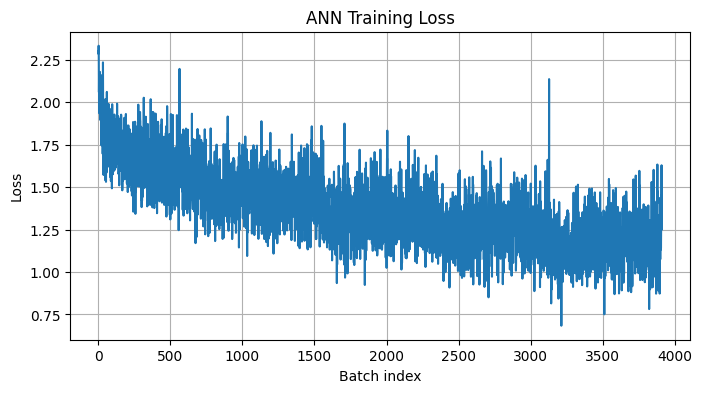

In [9]:
# Step - 7: Plot ANN training losses
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(ls_losses_ann)), ls_losses_ann)
plt.xlabel("Batch index")
plt.ylabel("Loss")
plt.title("ANN Training Loss")
plt.grid(True)
plt.show()


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

This code also calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

ANN Accuracy:  0.5228
ANN Precision: 0.5222
ANN Recall:    0.5228
ANN F1-Score:  0.5196


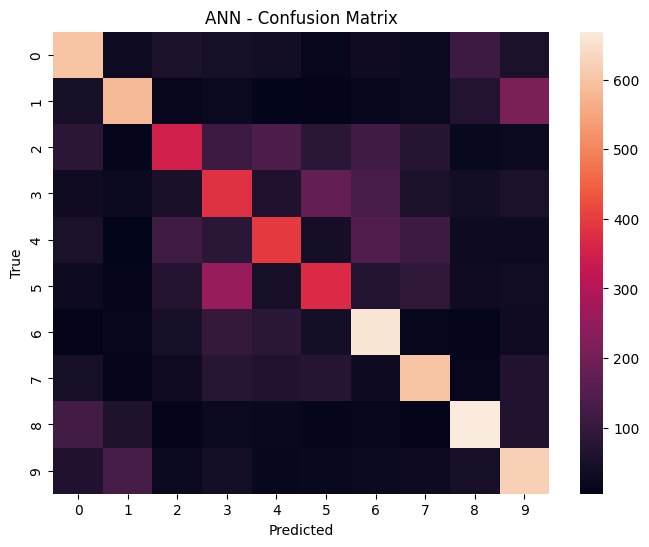

In [10]:
# Step - 8: Evaluate ANN
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_ann(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

# Metrics (use macro averaging to treat all classes equally)
accuracy_ann  = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='macro', zero_division=0)
recall_ann    = recall_score(all_labels_ann, all_preds_ann, average='macro', zero_division=0)
f1_ann        = f1_score(all_labels_ann, all_preds_ann, average='macro', zero_division=0)
cm_ann        = confusion_matrix(all_labels_ann, all_preds_ann)

print(f"ANN Accuracy:  {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall:    {recall_ann:.4f}")
print(f"ANN F1-Score:  {f1_ann:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_ann, annot=False, fmt='d')
plt.title("ANN - Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 9**
This block defines a simple Convolutional Neural Network (CNN) architecture using PyTorch. The model will consist of convolutional layers, activation functions, pooling layers, and fully connected layers to classify images from the CIFAR-10 dataset.
1) <blue>**class CNN(nn.Module)**</blue>: This defines a custom CNN class that inherits from PyTorch's nn.Module, the base class for all neural networks in PyTorch.
2) <blue>**self.conv**</blue>: These define the two convolutional layers. The first takes an <blue>**input**</blue> with <green>**3 channels (RGB)**</green> and produces <green>**32**</green> <blue>**feature maps**</blue>. The second takes <green>**32**</green> <blue>**input channels**</blue> and produces <green>**64**</green> <blue>**feature maps**</blue>.
3) <blue>**self.pool**</blue>: A max-pooling layer that reduces the size of the feature maps by <green>**half (downsampling)**</green>. It takes the maximum value over a <green>**2x2**</green> <blue>**grid**</blue> with a <blue>**stride**</blue> of <green>**2**</green>.
4) <blue>**self.fc**</blue>: Fully connected layers. The first layer takes the flattened feature maps from the convolutional layers as input and <blue>**outputs**</blue> <green>**512**</green> features. The second layer maps the <green>**512**</green> <blue>**features**</blue> to <green>**10**</green> <blue>**output classes**</blue> (for the 10 CIFAR-10 categories).
5) <blue>**forward(self, x)**</blue>: This function defines how data flows through the network. It applies the convolutional layers, pooling, and fully connected layers in sequence.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [11]:
# Step - 9: Define a simple CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # 3 -> 32
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 32 -> 64
        self.pool = nn.MaxPool2d(2,2)
        self.relu = nn.ReLU(inplace=True)
        # after two poolings: 32x32 -> 16x16 -> 8x8 ; channels = 64
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 10**
This block defines the training loop for the CNN model. It will train the model over multiple epochs, compute the loss using cross-entropy, and optimize the model using an optimizer like SGD.
1) <blue>**optimizer.zero_grad()**</blue>: <green>**Clears**</green> the <blue>**gradients**</blue> from the previous iteration to prevent accumulation.
2) <blue>**loss.backward()**</blue>: Computes the <blue>**gradients**</blue> via <green>**backpropagation**</green>.
3) <blue>**optimizer.step()**</blue>: Updates the model's parameters based on the <green>**computed gradients**</green>.
4) <blue>**running_loss**</blue>: Keeps track of the <blue>**cumulative loss**</blue> for the epoch, which is divided by the <green>**number of batches**</green> to return the <blue>**average loss**</blue>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [12]:
# Step - 10: Initialize and train the CNN
model_cnn = CNN().to(device)
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model_cnn.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        loss = criterion_cnn(outputs, labels)

        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

        if (i+1) % 100 == 0:
            print(f'CNN Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
print("Finished CNN training")


CNN Epoch [1/5], Step [100/782], Loss: 1.4500
CNN Epoch [1/5], Step [200/782], Loss: 1.5161
CNN Epoch [1/5], Step [300/782], Loss: 1.2875
CNN Epoch [1/5], Step [400/782], Loss: 1.1681
CNN Epoch [1/5], Step [500/782], Loss: 0.9335
CNN Epoch [1/5], Step [600/782], Loss: 1.0181
CNN Epoch [1/5], Step [700/782], Loss: 1.1418
CNN Epoch [2/5], Step [100/782], Loss: 0.8469
CNN Epoch [2/5], Step [200/782], Loss: 0.9760
CNN Epoch [2/5], Step [300/782], Loss: 1.0309
CNN Epoch [2/5], Step [400/782], Loss: 0.7827
CNN Epoch [2/5], Step [500/782], Loss: 0.8295
CNN Epoch [2/5], Step [600/782], Loss: 0.8513
CNN Epoch [2/5], Step [700/782], Loss: 0.7259
CNN Epoch [3/5], Step [100/782], Loss: 0.6549
CNN Epoch [3/5], Step [200/782], Loss: 0.6984
CNN Epoch [3/5], Step [300/782], Loss: 0.6370
CNN Epoch [3/5], Step [400/782], Loss: 0.6543
CNN Epoch [3/5], Step [500/782], Loss: 0.7713
CNN Epoch [3/5], Step [600/782], Loss: 0.7054
CNN Epoch [3/5], Step [700/782], Loss: 0.7208
CNN Epoch [4/5], Step [100/782], L

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 11**
This code performs evaluation on the test set by moving data to the appropriate device, running the model to get predictions, and then calculating key performance metrics using the predicted and actual labels.
1) <blue>**model_cnn.eval()**</blue>: The code begins by setting the model to <green>**evaluation mode**</green> to ensure proper inference behavior.
2) <blue>**all_preds_cnn, all_labels_cnn**</blue>: These lists are initialized to store <green>**predicted**</green> and <green>**true labels**</green>, respectively.
3) <blue>**torch.no_grad()**</blue>: This is used to <green>**disable gradients**</green>, save memory and speed up computations, the test set is processed in batches from test_loader, where both images and labels are moved to the correct device.
6) After processing the test set, evaluation metrics such as <blue>**accuracy**</blue>, <blue>**precision**</blue>, <blue>**recall**</blue>, and <blue>**F1-score**</blue> are calculated.
7) Finally, the results are printed to display the performance of the CNN model

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

CNN Accuracy:  0.7290
CNN Precision: 0.7346
CNN Recall:    0.7290
CNN F1-Score:  0.7297


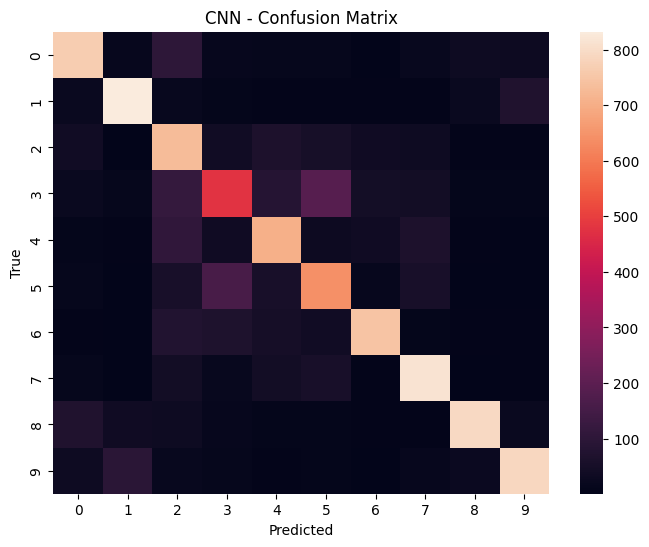

In [13]:
# Step - 11: Test/evaluate CNN
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn  = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='macro', zero_division=0)
recall_cnn    = recall_score(all_labels_cnn, all_preds_cnn, average='macro', zero_division=0)
f1_cnn        = f1_score(all_labels_cnn, all_preds_cnn, average='macro', zero_division=0)
cm_cnn        = confusion_matrix(all_labels_cnn, all_preds_cnn)

print(f"CNN Accuracy:  {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall:    {recall_cnn:.4f}")
print(f"CNN F1-Score:  {f1_cnn:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=False, fmt='d')
plt.title("CNN - Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 12**
This code block compares performance of the trained ANN and CNN models, showing which one performs better.
1) <blue>**import pandas as pd**</blue>: The code starts by importing the <green>**Pandas library**</green>, which is used for data manipulation and creation of a comparison table.
2) <blue>**data dictionary**</blue>: A dictionary is defined with the keys 'Model', 'Accuracy', 'Precision', 'Recall', and 'F1-Score', containing <green>**placeholders (None)**</green> for both the 'ANN' and 'CNN' models. These placeholders will later hold the actual performance metrics.
3) <blue>**pd.DataFrame(data)**</blue>: The dictionary is converted into a <green>**Pandas DataFrame**</green>, which provides a tabular structure for easy comparison of the metrics between the two models.
4) <blue>**print(df_comparison)**</blue>: This line prints the <green>**comparison table**</green> of ANN and CNN metrics, enabling a visual representation of their performance.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [15]:
# Step - 12: Create comparison table between ANN and CNN
import pandas as pd

data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [round(accuracy_ann, 4), round(accuracy_cnn, 4)],
    'Precision': [round(precision_ann, 4), round(precision_cnn, 4)],
    'Recall': [round(recall_ann, 4), round(recall_cnn, 4)],
    'F1-Score': [round(f1_ann, 4), round(f1_cnn, 4)]
}
df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.5228     0.5222  0.5228    0.5196
1   CNN    0.7290     0.7346  0.7290    0.7297


### Advanced Steps (Optional for people targeting basic level)

### **Step - 13 (Understanding CNN Filters)**
This step aims to provide insight into what the convolutional filters in the CNN model have learned. By visualizing the weights of the filters in the first convolutional layer, we can get a sense of the basic features (like edges, corners, or textures) that the network is detecting in the images.

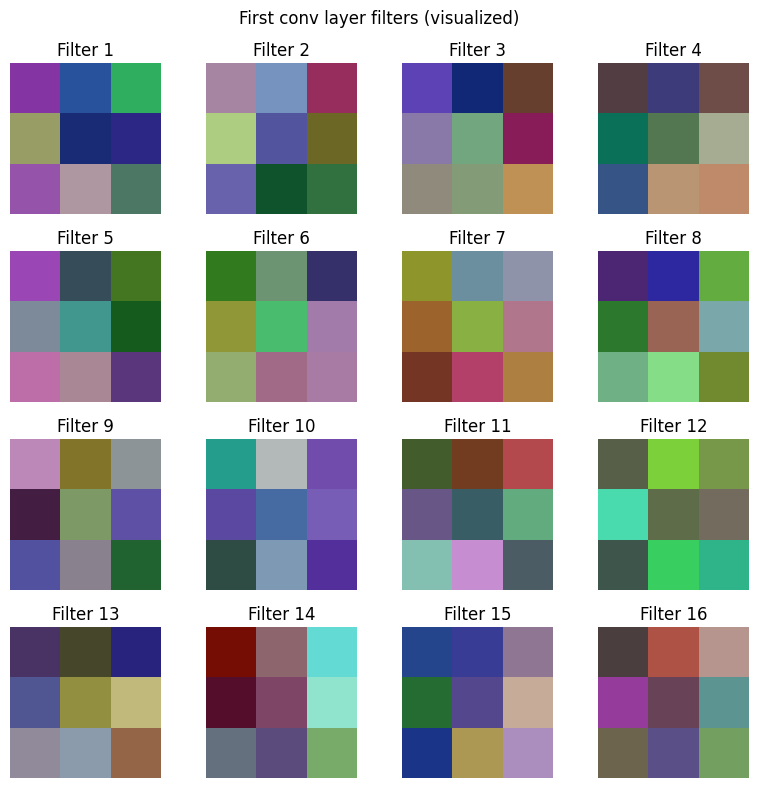

In [16]:
# Step - 13: Visualize filters from first conv layer of THE trained CNN (model_cnn)
first_conv_weights = model_cnn.conv1.weight.data.cpu().numpy()  # shape: (out_channels, in_channels, k, k)
# Normalize per-filter for display
min_w = first_conv_weights.min()
max_w = first_conv_weights.max()
w_norm = (first_conv_weights - min_w) / (max_w - min_w + 1e-8)

num_filters = w_norm.shape[0]
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(4, 4, figsize=(8,8))
axes = axes.flatten()

for i in range(num_plots):
    f = w_norm[i]  # shape (3,k,k)
    # transpose to (k,k,3) for imshow
    f_img = np.transpose(f, (1,2,0))
    # normalize each channel to [0,1] already done globally above
    axes[i].imshow(f_img)
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.suptitle("First conv layer filters (visualized)")
plt.tight_layout()
plt.show()


### **Step - 14 (Data Augmentation)**
Data augmentation is a technique used to increase the diversity of the training dataset by applying random transformations such as rotations, flips, and crops to the images. This helps to prevent overfitting and can improve the generalization ability of the model. We will apply data augmentation to the training data and retrain the CNN model to see if it improves performance.

In [17]:
# Step - 14: Data augmentation, reload dataset and retrain CNN (augmented)
train_transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset_aug = CIFAR10(root='./data', train=True, transform=train_transform_augmented, download=False)
train_loader_aug = DataLoader(dataset=train_dataset_aug, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=torch.cuda.is_available())

# Keep test_dataset as before (no augmentation)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=torch.cuda.is_available())

model_cnn_augmented = CNN().to(device)
criterion_aug = nn.CrossEntropyLoss()
optimizer_aug = optim.Adam(model_cnn_augmented.parameters(), lr=0.001)

print("Training CNN with data augmentation...")
num_epochs = 5
for epoch in range(num_epochs):
    model_cnn_augmented.train()
    for i, (images, labels) in enumerate(train_loader_aug):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn_augmented(images)
        loss = criterion_aug(outputs, labels)

        optimizer_aug.zero_grad()
        loss.backward()
        optimizer_aug.step()

        if (i+1) % 100 == 0:
            print(f'AugCNN Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_aug)}], Loss: {loss.item():.4f}')
print("Finished training augmented CNN")


Training CNN with data augmentation...
AugCNN Epoch [1/5], Step [100/782], Loss: 2.0018
AugCNN Epoch [1/5], Step [200/782], Loss: 1.8102
AugCNN Epoch [1/5], Step [300/782], Loss: 1.3861
AugCNN Epoch [1/5], Step [400/782], Loss: 1.2535
AugCNN Epoch [1/5], Step [500/782], Loss: 1.5081
AugCNN Epoch [1/5], Step [600/782], Loss: 1.4603
AugCNN Epoch [1/5], Step [700/782], Loss: 1.1862
AugCNN Epoch [2/5], Step [100/782], Loss: 1.3256
AugCNN Epoch [2/5], Step [200/782], Loss: 1.4099
AugCNN Epoch [2/5], Step [300/782], Loss: 1.2994
AugCNN Epoch [2/5], Step [400/782], Loss: 1.3183
AugCNN Epoch [2/5], Step [500/782], Loss: 1.2486
AugCNN Epoch [2/5], Step [600/782], Loss: 1.0498
AugCNN Epoch [2/5], Step [700/782], Loss: 1.1299
AugCNN Epoch [3/5], Step [100/782], Loss: 1.2688
AugCNN Epoch [3/5], Step [200/782], Loss: 0.9174
AugCNN Epoch [3/5], Step [300/782], Loss: 1.0648
AugCNN Epoch [3/5], Step [400/782], Loss: 0.7859
AugCNN Epoch [3/5], Step [500/782], Loss: 0.9626
AugCNN Epoch [3/5], Step [600/

### **Step - 15 (Visualize Incorrect Predictions)**
Visualizing some of the images that the CNN model misclassified can provide valuable insights into the model's weaknesses and help identify areas for improvement. This step will display a few examples of images where the model's predicted label does not match the true label.

Using augmented CNN for evaluation


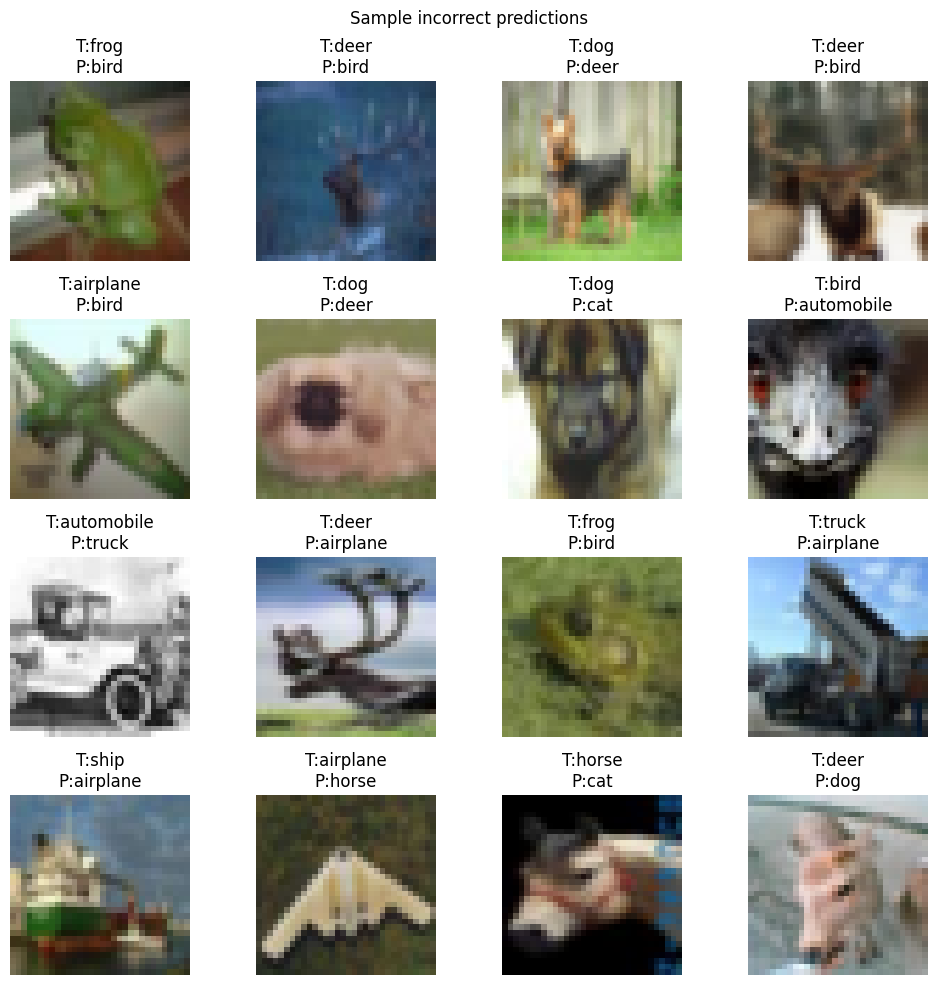

In [18]:
# Step - 15: Visualize some incorrect predictions from the best-available model (prefer augmented if present)
# pick model_to_evaluate = model_cnn_augmented if available else model_cnn
try:
    model_to_evaluate = model_cnn_augmented
    print("Using augmented CNN for evaluation")
except NameError:
    model_to_evaluate = model_cnn
    print("Using base CNN for evaluation")

model_to_evaluate.eval()
incorrect_images = []
incorrect_preds  = []
incorrect_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images_device = images.to(device)
        outputs = model_to_evaluate(images_device)
        _, preds = torch.max(outputs, 1)
        preds = preds.cpu()
        for img, p, t in zip(images, preds, labels):
            if p.item() != t.item():
                incorrect_images.append(img)
                incorrect_preds.append(p.item())
                incorrect_labels.append(t.item())
        if len(incorrect_images) >= 16:
            break

# helper to unnormalize for plotting
def unnormalize(img_tensor):
    img = img_tensor.numpy()
    img = np.transpose(img, (1,2,0))  # C,H,W -> H,W,C
    img = img * 0.5 + 0.5            # inverse normalization
    img = np.clip(img, 0, 1)
    return img

num_show = min(16, len(incorrect_images))
fig, axes = plt.subplots(4,4, figsize=(10,10))
axes = axes.flatten()
for i in range(num_show):
    img = unnormalize(incorrect_images[i])
    axes[i].imshow(img)
    axes[i].set_title(f"T:{classes[incorrect_labels[i]]}\nP:{classes[incorrect_preds[i]]}")
    axes[i].axis('off')
for j in range(num_show, len(axes)):
    axes[j].axis('off')
plt.suptitle("Sample incorrect predictions")
plt.tight_layout()
plt.show()
